In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])
import numpy as np

from scipy.interpolate import interp1d

import os

In [34]:
gcamp6f = pd.read_csv(r"C:\Users\zfj\data\optics\gcamp6f.csv", header=0, names=['wl','ex','em'])
gfp = pd.read_csv(r"C:\Users\zfj\data\optics\gfp.csv", header=0, names=['wl','ex','em','2p'])
tom = pd.read_csv(r"C:\Users\zfj\data\optics\tomato.csv", header=0, names=['wl','ex','em','2p'])

In [35]:
tom

,wl,ex,em,2p
0,300,0.1397,NaN,NaN
1,301,0.1245,NaN,NaN
2,302,0.1107,NaN,NaN
3,303,0.1001,NaN,NaN
4,304,0.0908,NaN,NaN
...,...,...,...,...
1095,1395,NaN,NaN,0.0
1096,1396,NaN,NaN,0.0
1097,1397,NaN,NaN,0.0
1098,1398,NaN,NaN,0.0


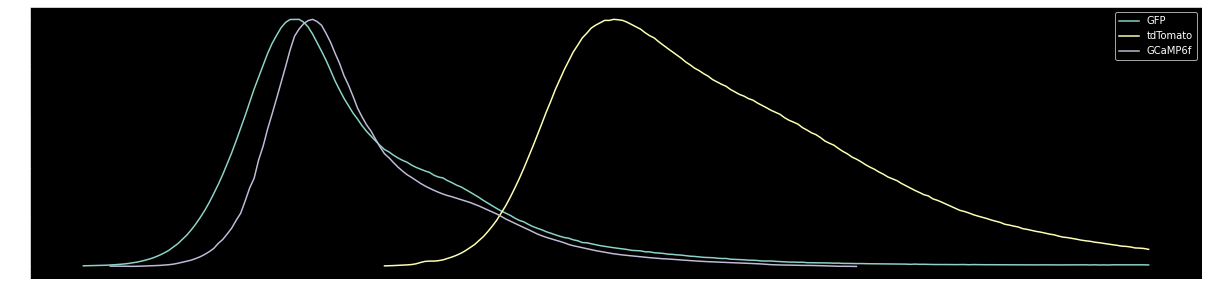

In [36]:
# plt.plot(gfp['wavelength'], gfp['EGFP ex'])
plt.figure(figsize=(21,5))
plt.xticks(np.arange(400,800,10))
plt.plot(gfp['wl'], gfp['em'])
plt.plot(tom['wl'], tom['em'])
plt.plot(gcamp6f['wl'], gcamp6f['em'])


plt.legend(['GFP','tdTomato', 'GCaMP6f'])

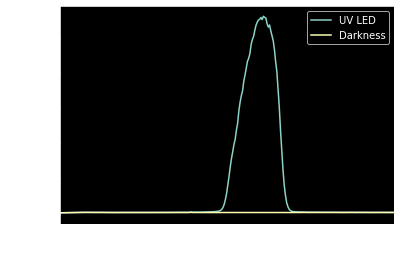

In [5]:
uv_led = pd.concat([pd.read_csv(os.path.join(r"C:\Users\zfj\data\optics\UV_filt",x), header=12, sep='\t', names=['wl','tr']) for x in os.listdir(r"C:\Users\zfj\data\optics\UV_filt")])
uv_led = uv_led.groupby('wl').mean().reset_index()


darkness = pd.concat([pd.read_csv(os.path.join(r"C:\Users\zfj\data\optics\Dark_filt",x), header=12, sep='\t', names=['wl','tr']) for x in os.listdir(r"C:\Users\zfj\data\optics\Dark_filt")])
darkness = darkness.groupby('wl').mean().reset_index()

plt.plot(uv_led.wl, uv_led.tr)
plt.plot(darkness.wl, darkness.tr)
# plt.ylim(200,400)
plt.xlim(350,450)
plt.legend(['UV LED','Darkness'])
plt.xlabel('Wavelength')
plt.ylabel('Intensity (a.u.)')

uv_led.tr = uv_led.tr - darkness.tr
uv_led.tr = uv_led.tr / uv_led.tr.max()
uv_led.tr[uv_led.tr<0] = 0


(0.0, 0.001)

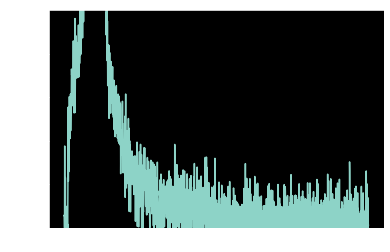

In [29]:
plt.plot(uv_led.wl, uv_led.tr)
plt.ylim([0,.001])

In [30]:
uv_pass = pd.read_csv(r"C:\Users\zfj\data\optics\402_15x_tr.txt", delimiter='\t', header=None, names=['wl','tr'])
uv_block = pd.read_csv(r"C:\Users\zfj\data\optics\et460lp_tr.txt", delimiter='\t', header=None, names=['wl','tr'])
uv_block2 = pd.read_csv(r"C:\Users\zfj\data\optics\ret493lp_tr.txt", delimiter='\t', header=None, names=['wl','tr'])
green_pass = pd.read_csv(r"C:\Users\zfj\data\optics\et525_50m_tr.txt", delimiter='\t', header=None, names=['wl','tr'])
dichroic = pd.read_csv(r"C:\Users\zfj\data\optics\XF2015_570DRLP.csv", names=['wl','tr'], header=0)
dichroic2 = pd.read_csv(r"C:\Users\zfj\data\optics\t570lpxr.txt", delimiter='\t', header=None, names=['wl','tr'])
dichroic3 = pd.read_csv(r"C:\Users\zfj\data\optics\zt561rdc.txt", delimiter='\t', header=None, names=['wl','tr'])
dichroic4 = pd.read_csv(r"C:\Users\zfj\data\optics\zt561rdc_xr.txt", delimiter='\t', header=None, names=['wl','tr'])

dichroic.tr /= 100

red_pass = pd.read_csv(r"C:\Users\zfj\data\optics\XF3083_595AF60.csv", names=['wl','tr'], header=0)
red_pass.tr /= 100



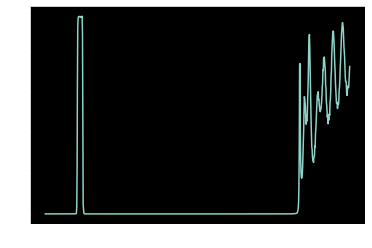

In [31]:
plt.plot(uv_pass.wl, uv_pass.tr)

In [32]:
wl = np.arange(300, 900,)
fn = lambda x,y: interp1d(x,y,bounds_error=False, fill_value=np.nan)(wl)

gfp_em = fn(gfp.wl, gfp.em)
tom_em = fn(tom.wl, tom.em)
uv_em = fn(uv_led.wl, uv_led.tr)
uv_em[uv_em<0] = 0 

uvp_tr = fn(uv_pass.wl, uv_pass.tr)
uvb_tr = fn(uv_block.wl, uv_block.tr)
uvb2_tr = fn(uv_block2.wl, uv_block2.tr)
dcr_tr = fn(dichroic.wl, dichroic.tr)
dcr2_tr = fn(dichroic2.wl, dichroic2.tr)
dcr3_tr = fn(dichroic3.wl, dichroic3.tr)
dcr4_tr = fn(dichroic4.wl, dichroic4.tr)
grn_tr = fn(green_pass.wl, green_pass.tr)
red_tr = fn(red_pass.wl, red_pass.tr)




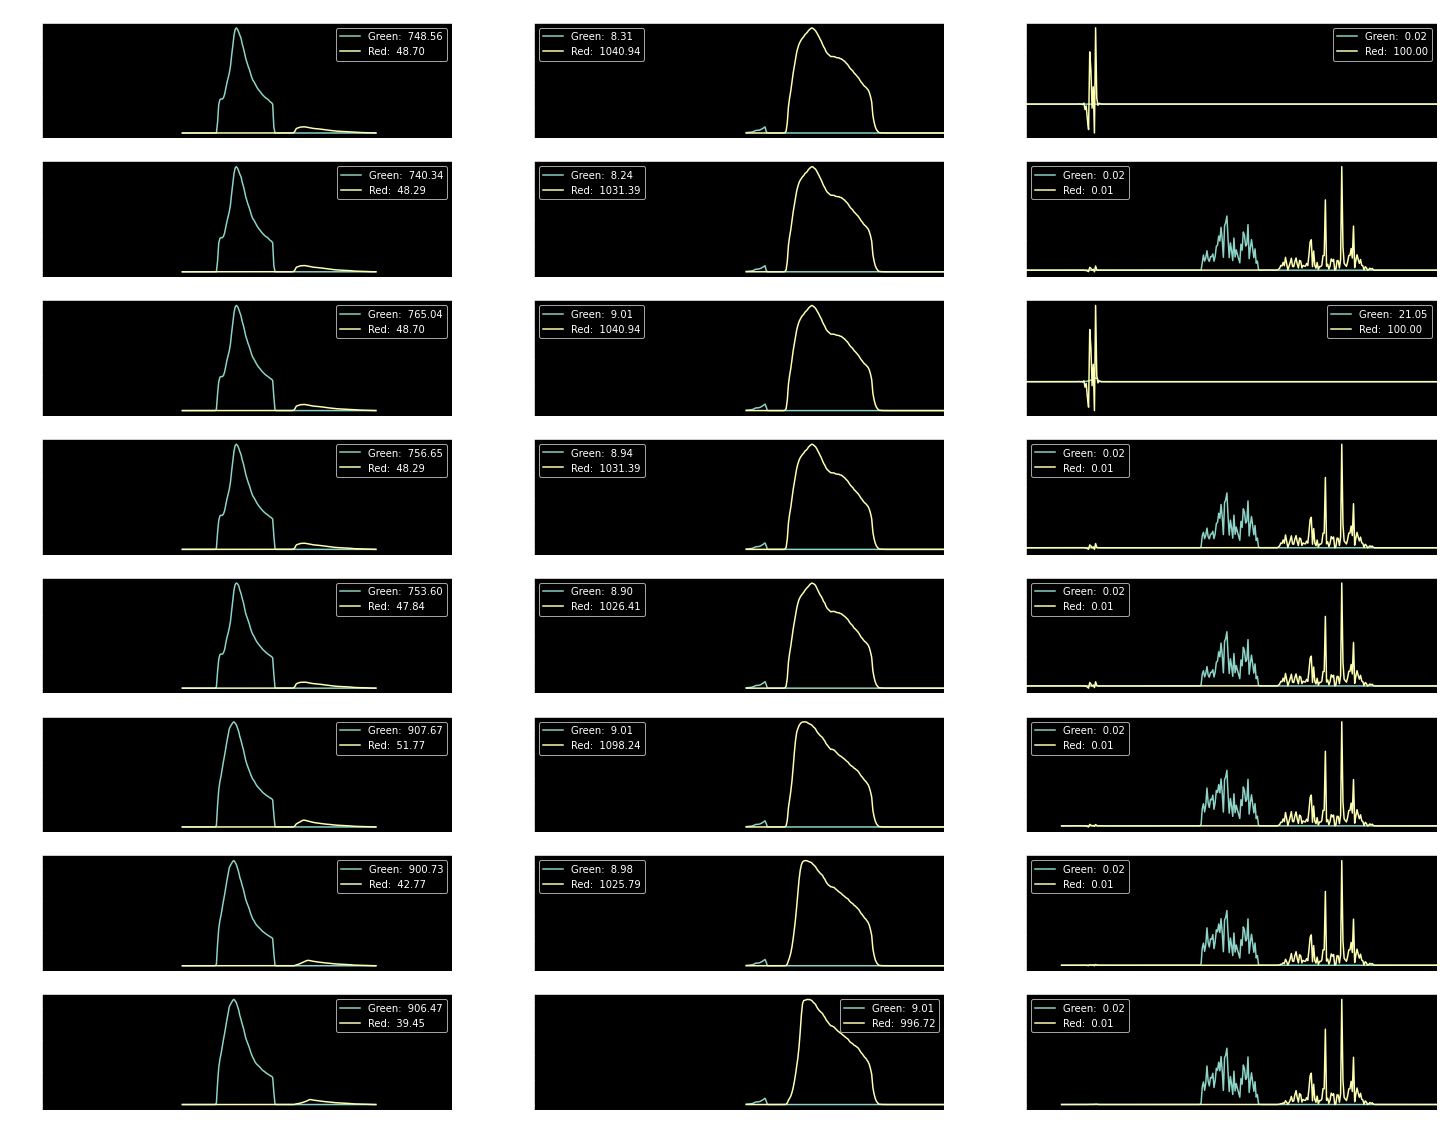

In [41]:
fig,axs = plt.subplots(8,3,figsize=(25,20))


gem = gfp[gfp.wl==927]['2p'].values * gfp_em * 33.54 #brightness
# gem = gfp_em * 33.54
rem = tom[tom.wl==927]['2p'].values * tom_em * 95.22
uvem = 10000000 * uv_em * uvp_tr / 162.13 * 100


def do_plot(i, g_filt, r_filt, ylabel):
    plt.sca(axs[i,0])
    plt.plot(wl, gem * g_filt)
    plt.plot(wl, gem * r_filt)
    plt.ylabel(ylabel)
    plt.legend([f'Green: {np.nansum(gem * g_filt): 0.02f}',f'Red: {np.nansum(gem * r_filt): 0.02f}'])
    plt.xlim(350,700)    
    if i==0:
        plt.title('eGFP')

    plt.sca(axs[i,1])
    plt.plot(wl, rem * g_filt)
    plt.plot(wl, rem * r_filt)
    plt.legend([f'Green: {np.nansum(rem * g_filt): 0.02f}',f'Red: {np.nansum(rem * r_filt): 0.02f}'])
    plt.xlim(350,700)    
    if i==0:
        plt.title('tdTomato')

    plt.sca(axs[i,2])
    plt.plot(wl, uvem * g_filt)
    plt.plot(wl, uvem * r_filt)
    plt.legend([f'Green: {np.nansum(uvem * g_filt): 0.02f}',f'Red: {np.nansum(uvem * r_filt): 0.02f}'])
    plt.xlim(350,700)
    if i==0:
        plt.title('UV LED')


g_filt = (1-dcr_tr) * grn_tr * grn_tr
r_filt = dcr_tr * red_tr

do_plot(0, g_filt, r_filt, 'Current')

g_filt *= uvb_tr
r_filt *= uvb_tr

do_plot(1, g_filt, r_filt, '+UV_HP')

g_filt = (1-dcr_tr) * grn_tr
r_filt = dcr_tr * red_tr

do_plot(2, g_filt, r_filt, '-G_BP x 1')

g_filt = (1-dcr_tr) * grn_tr * uvb_tr
r_filt = dcr_tr * red_tr * uvb_tr

do_plot(3,g_filt,r_filt, '+UV_HP, -G_BP x 1')


g_filt = (1-dcr_tr) * grn_tr * uvb2_tr
r_filt = dcr_tr * red_tr * uvb2_tr

do_plot(4,g_filt,r_filt, '+UV_HP2, -G_BP x 1')


g_filt = (1-dcr2_tr) * grn_tr * uvb2_tr
r_filt = dcr2_tr * red_tr * uvb2_tr

do_plot(5,g_filt,r_filt, 'UV_HP2, DCR2')


g_filt = (1-dcr3_tr) * grn_tr * uvb2_tr
r_filt = dcr3_tr * red_tr * uvb2_tr

do_plot(6,g_filt,r_filt, 'UV_HP2, DCR3')


g_filt = (1-dcr4_tr) * grn_tr * uvb2_tr
r_filt = dcr4_tr * red_tr * uvb2_tr

do_plot(7,g_filt,r_filt, 'UV_HP2, DCR4')

# do_plot(3, g_filt, r_filt, '-G_BP x 2')


# plt.figtext(.23,.9,'eGFP', fontsize=22, horizontalalignment='center')
# plt.figtext(.5,.9,'tdTomato', fontsize=22, horizontalalignment='center')
# plt.figtext(.77,.9,'UV LED', fontsize=22, horizontalalignment='center')

# plt.figtext(.1, .77,'Current', fontsize=22, horizontalalignment='center', rotation=90)
# plt.figtext(.1, .57,'+UVLP', fontsize=22, horizontalalignment='center', rotation=90)
# plt.figtext(.1, .32,'-GreenPassX1', fontsize=22, horizontalalignment='center', rotation=90)
# plt.figtext(.1, .1,'-GreenPassX2', fontsize=22, horizontalalignment='center', rotation=90)





23.6391646174603 2.408376608113303 0.3262938183257641 40.88223478439331 0.007445496615587516 0.0051992072661284795
23.6391646174603 2.408376608113303 0.3262938183257641 40.88223478439331 2.8058249142375233e-09 1.6213242659898837e-05
24.23696962115486 2.408376608113303 0.3539878237155253 40.88223478439331 0.007634390264383879 0.0051992072661284795
23.382256802865843 2.3874664774399115 0.32353901528121937 40.50726082281466 0.007367090472314051 0.005124458001219793


In [205]:
0.007445496615587516 / 2.8058249142375233e-09, 0.0051992072661284795 / 1.6213242659898837e-05


(2653585.6096390868, 320.67658365392776)

In [240]:
# plt.plot(gfp.wl,gfp['2p'])
# # plt.plot(gfp.wl,gfp.em)
# plt.plot(tom.wl,tom['2p'])



tom[tom.wl==927]['2p']

627    0.2674
Name: 2p, dtype: float64

(300.0, 600.0)

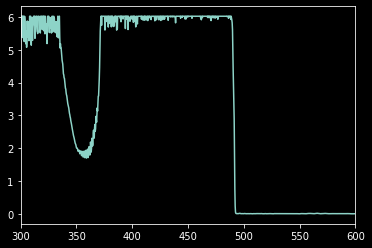

In [269]:
plt.plot(uv_block2.wl,-np.log10(uv_block2.tr))
plt.xlim([300,600])


(300.0, 600.0)

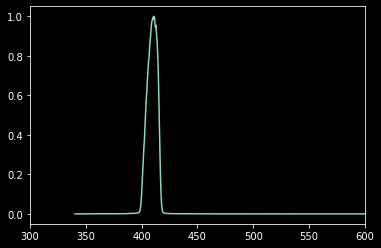

In [273]:
plt.plot(uv_led.wl, uv_led.tr)
plt.xlim([300,600])
# uv_led

In [3]:
alexae = [488, 546, 555, 568, 594, 647, 680,]
dfs = []
for a in alexae:
    ex = pd.read_csv(f"C:\\Users\\zfj\\data\\optics\\alexa\\{a}_ex.txt", delimiter='\t', header=None, names=['wl','ex'])
    em = pd.read_csv(f"C:\\Users\\zfj\\data\\optics\\alexa\\{a}_em.txt", delimiter='\t', header=None, names=['wl','em'])

    dfs.append(ex.merge(em, how='outer', on = 'wl'))



In [6]:
dfs[0]

,wl,ex,em
0,251.0,0.940730,NaN
1,252.0,0.882270,NaN
2,253.0,0.828492,NaN
3,254.0,0.782313,NaN
4,255.0,0.744164,NaN
...,...,...,...
420,671.0,0.000213,0.006018
421,672.0,0.000010,0.005557
422,673.0,0.000010,0.005344
423,674.0,0.000010,0.005249


(251.0, 800.0)

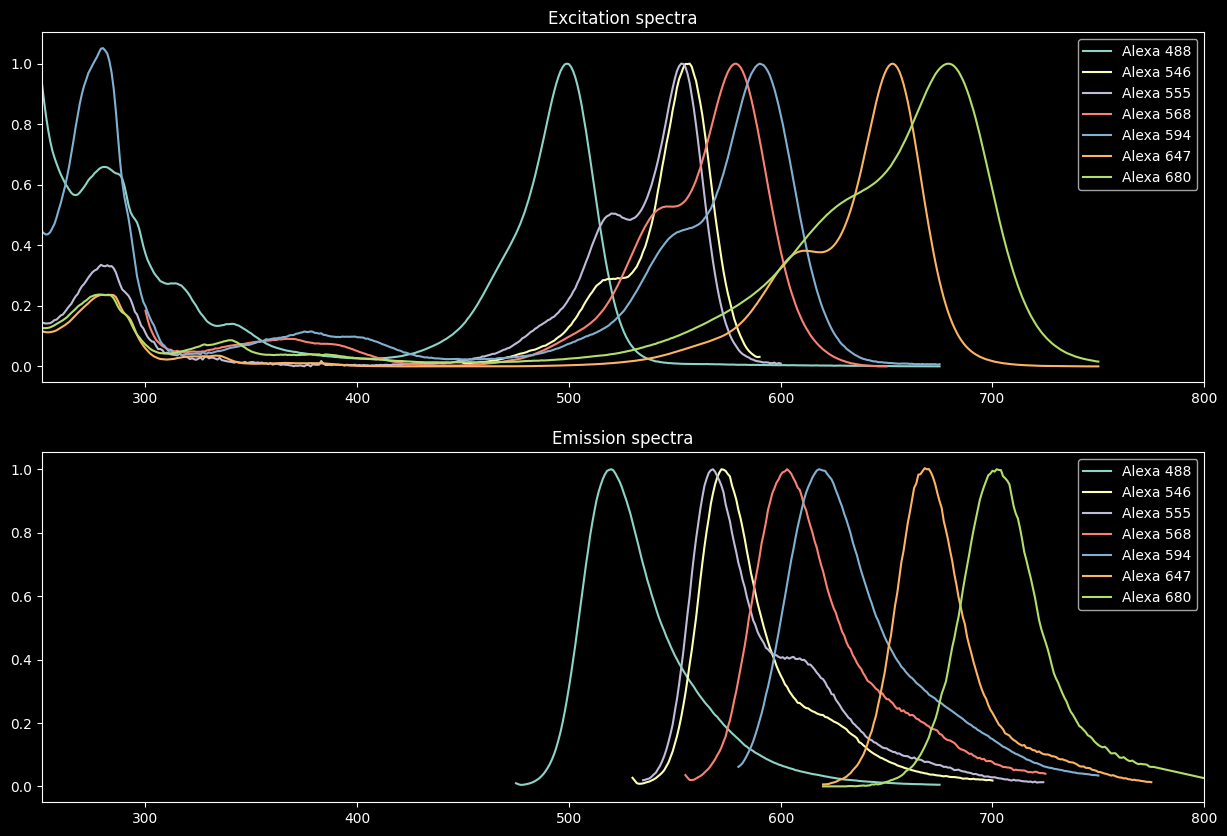

In [4]:
_,axs = plt.subplots(2,1,figsize=(15,10))
for a,df in zip(alexae,dfs):
    l = axs[0].plot(df.wl, df.ex, label=f"Alexa {a}")
    l = axs[1].plot(df.wl, df.em, label=f"Alexa {a}")
    # plt.plot(df.wl, df.ex, linestyle='--', color = l[0].get_color())

# plt.plot(gfp.wl, gfp.em, color=[0,1,0])
# plt.plot(tom.wl, tom.em, color=[1,.7,0])

axs[0].set_title('Excitation spectra')
axs[0].legend()
axs[0].set_xlim(251,800)
axs[1].set_title('Emission spectra')
axs[1].legend()
axs[1].set_xlim(251,800)


In [5]:
import os
import shutil
#ON Alphas
ONas = [
    '062817Bc4',
    '062917Ac6',
    '062917Bc4',
    '071417Bc1',
    '071417Bc4',
    '071417Bc5',
    '090617Bc2',
    '091217Bc2',
    '091217Bc3',
    ]

for ONa in ONas:

    # do we want the skel? swc?
    if not os.path.exists(os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}.tif")):
        shutil.copyfile(os.path.join(r"R:\Ophthalmology\Research\SchwartzLab\Images\2P", ONa, f"{ONa}.tif"), os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}.tif"))
        
    if not os.path.exists(os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}_skel.tif")):
        shutil.copyfile(os.path.join(r"R:\Ophthalmology\Research\SchwartzLab\Images\2P", ONa, f"{ONa}_skel.tif"), os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}_skel.tif"))



C:\Users\zfj\AppData\Local\Temp\ipykernel_4924\933146038.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}.tif"))
C:\Users\zfj\AppData\Local\Temp\ipykernel_4924\933146038.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  skel = iio.imread(os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}_skel.tif"))


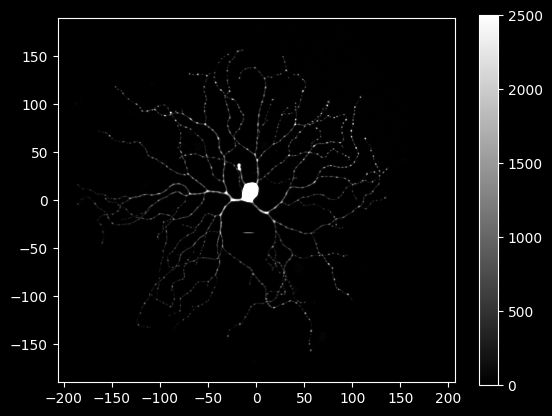

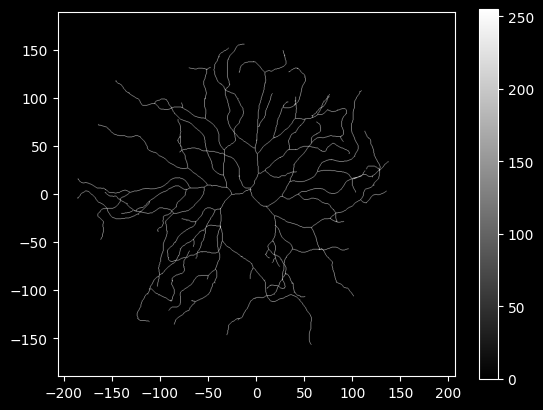

In [6]:
import imageio as iio
# plt.figure(figsize=(7,7))

# ONa = ONas[0]

projs = []
for i, ONa in enumerate(ONas):

    img = iio.imread(os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}.tif"))
    proj = img.max(axis=0)
    # 1) from the MIP, assume a normalized concentration of 488

    skel = iio.imread(os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}_skel.tif"))


    # lo,hi = np.percentile(proj[skel.max(axis=0)>0], (2,98))
    lo, hi = proj.min(), proj.max()

    projs.append(np.clip((proj.astype(float) - lo) / (hi - lo), 0.0, 1.0))

d, n= iio.get_reader(os.path.join(r"C:\Users\zfj\data\alphas", f"{ONa}.tif")).get_meta_data(0)['XResolution']
mpp = n / d

e = [-mpp * img.shape[2] / 2, mpp * img.shape[2] / 2, -mpp * img.shape[1] / 2, mpp * img.shape[1] / 2]

plt.imshow(img.max(axis=0), extent=e, cmap='gray')
plt.colorbar()
plt.clim(0,2500)
plt.show()



plt.imshow(skel.max(axis=0), extent=e, cmap='gray')
plt.colorbar()
# plt.clim(0,2500)


(0.0, 1.0, 0.0, 1.0)

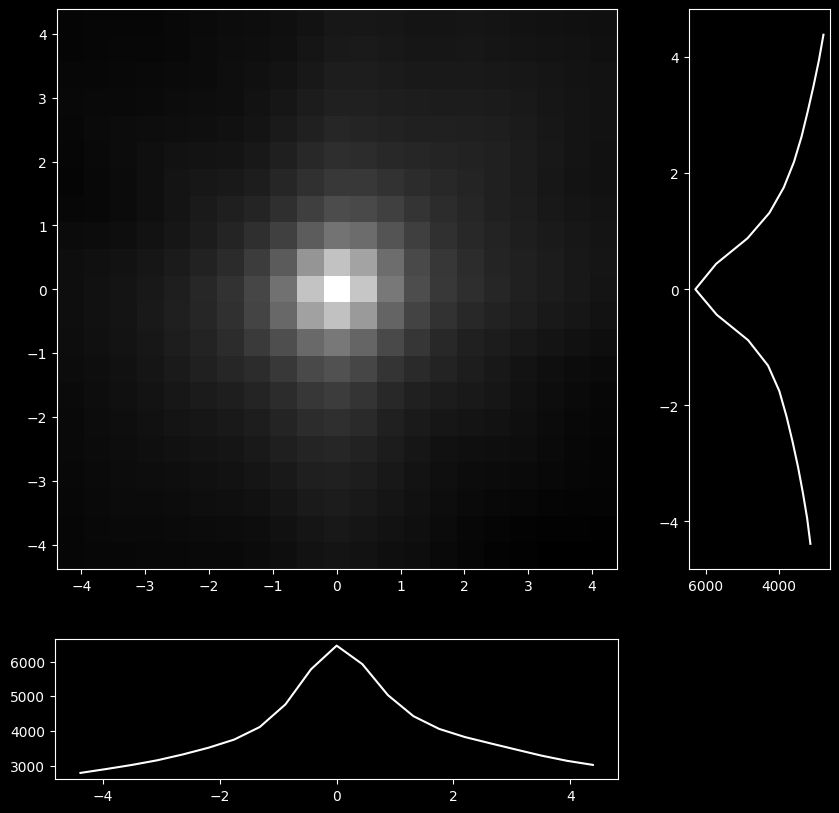

In [7]:
psf_2d = np.zeros((21, 21))
psf_N = np.zeros_like(psf_2d, dtype=int)


for y,x in np.argwhere(skel.max(axis=0)):
    psf_2d += projs[-1][y-10:y+11, x-10:x+11]

_, axs = plt.subplots(2,2,gridspec_kw={'height_ratios':[4,1], 'width_ratios':[4,1]}, figsize=(10,10))
axs[0,0].imshow(psf_2d, extent = [mpp * -10, mpp * 10, mpp * -10, mpp * 10], cmap='gray')
axs[0,1].plot(psf_2d.sum(axis=1), np.linspace(-mpp*10, mpp*10, 21), c='w')
axs[0,1].invert_xaxis()
axs[1,0].plot(np.linspace(-mpp*10, mpp*10, 21), psf_2d.sum(axis=0), c='w')
axs[1,1].axis('off')


In [8]:
projs = [np.pad(proj, ((1000-proj.shape[0], 0), (1000-proj.shape[1], 0))) for proj in projs]

[proj.shape for proj in projs]

[(1000, 1000),
 (1000, 1000),
 (1000, 1000),
 (1000, 1000),
 (1000, 1000),
 (1000, 1000),
 (1000, 1000),
 (1000, 1000),
 (1000, 1000)]

C:\Users\zfj\AppData\Local\Temp\ipykernel_4924\4169057108.py:13: RuntimeWarning: Mean of empty slice
  g = projs[1] * np.nanmean(dfs[1][(dfs[1].wl >= (470 + 10*i)) & (dfs[1].wl < (480 + 10*i))].em)
C:\Users\zfj\AppData\Local\Temp\ipykernel_4924\4169057108.py:14: RuntimeWarning: Mean of empty slice
  b = projs[2] * np.nanmean(dfs[2][(dfs[2].wl >= (470 + 10*i)) & (dfs[2].wl < (480 + 10*i))].em)


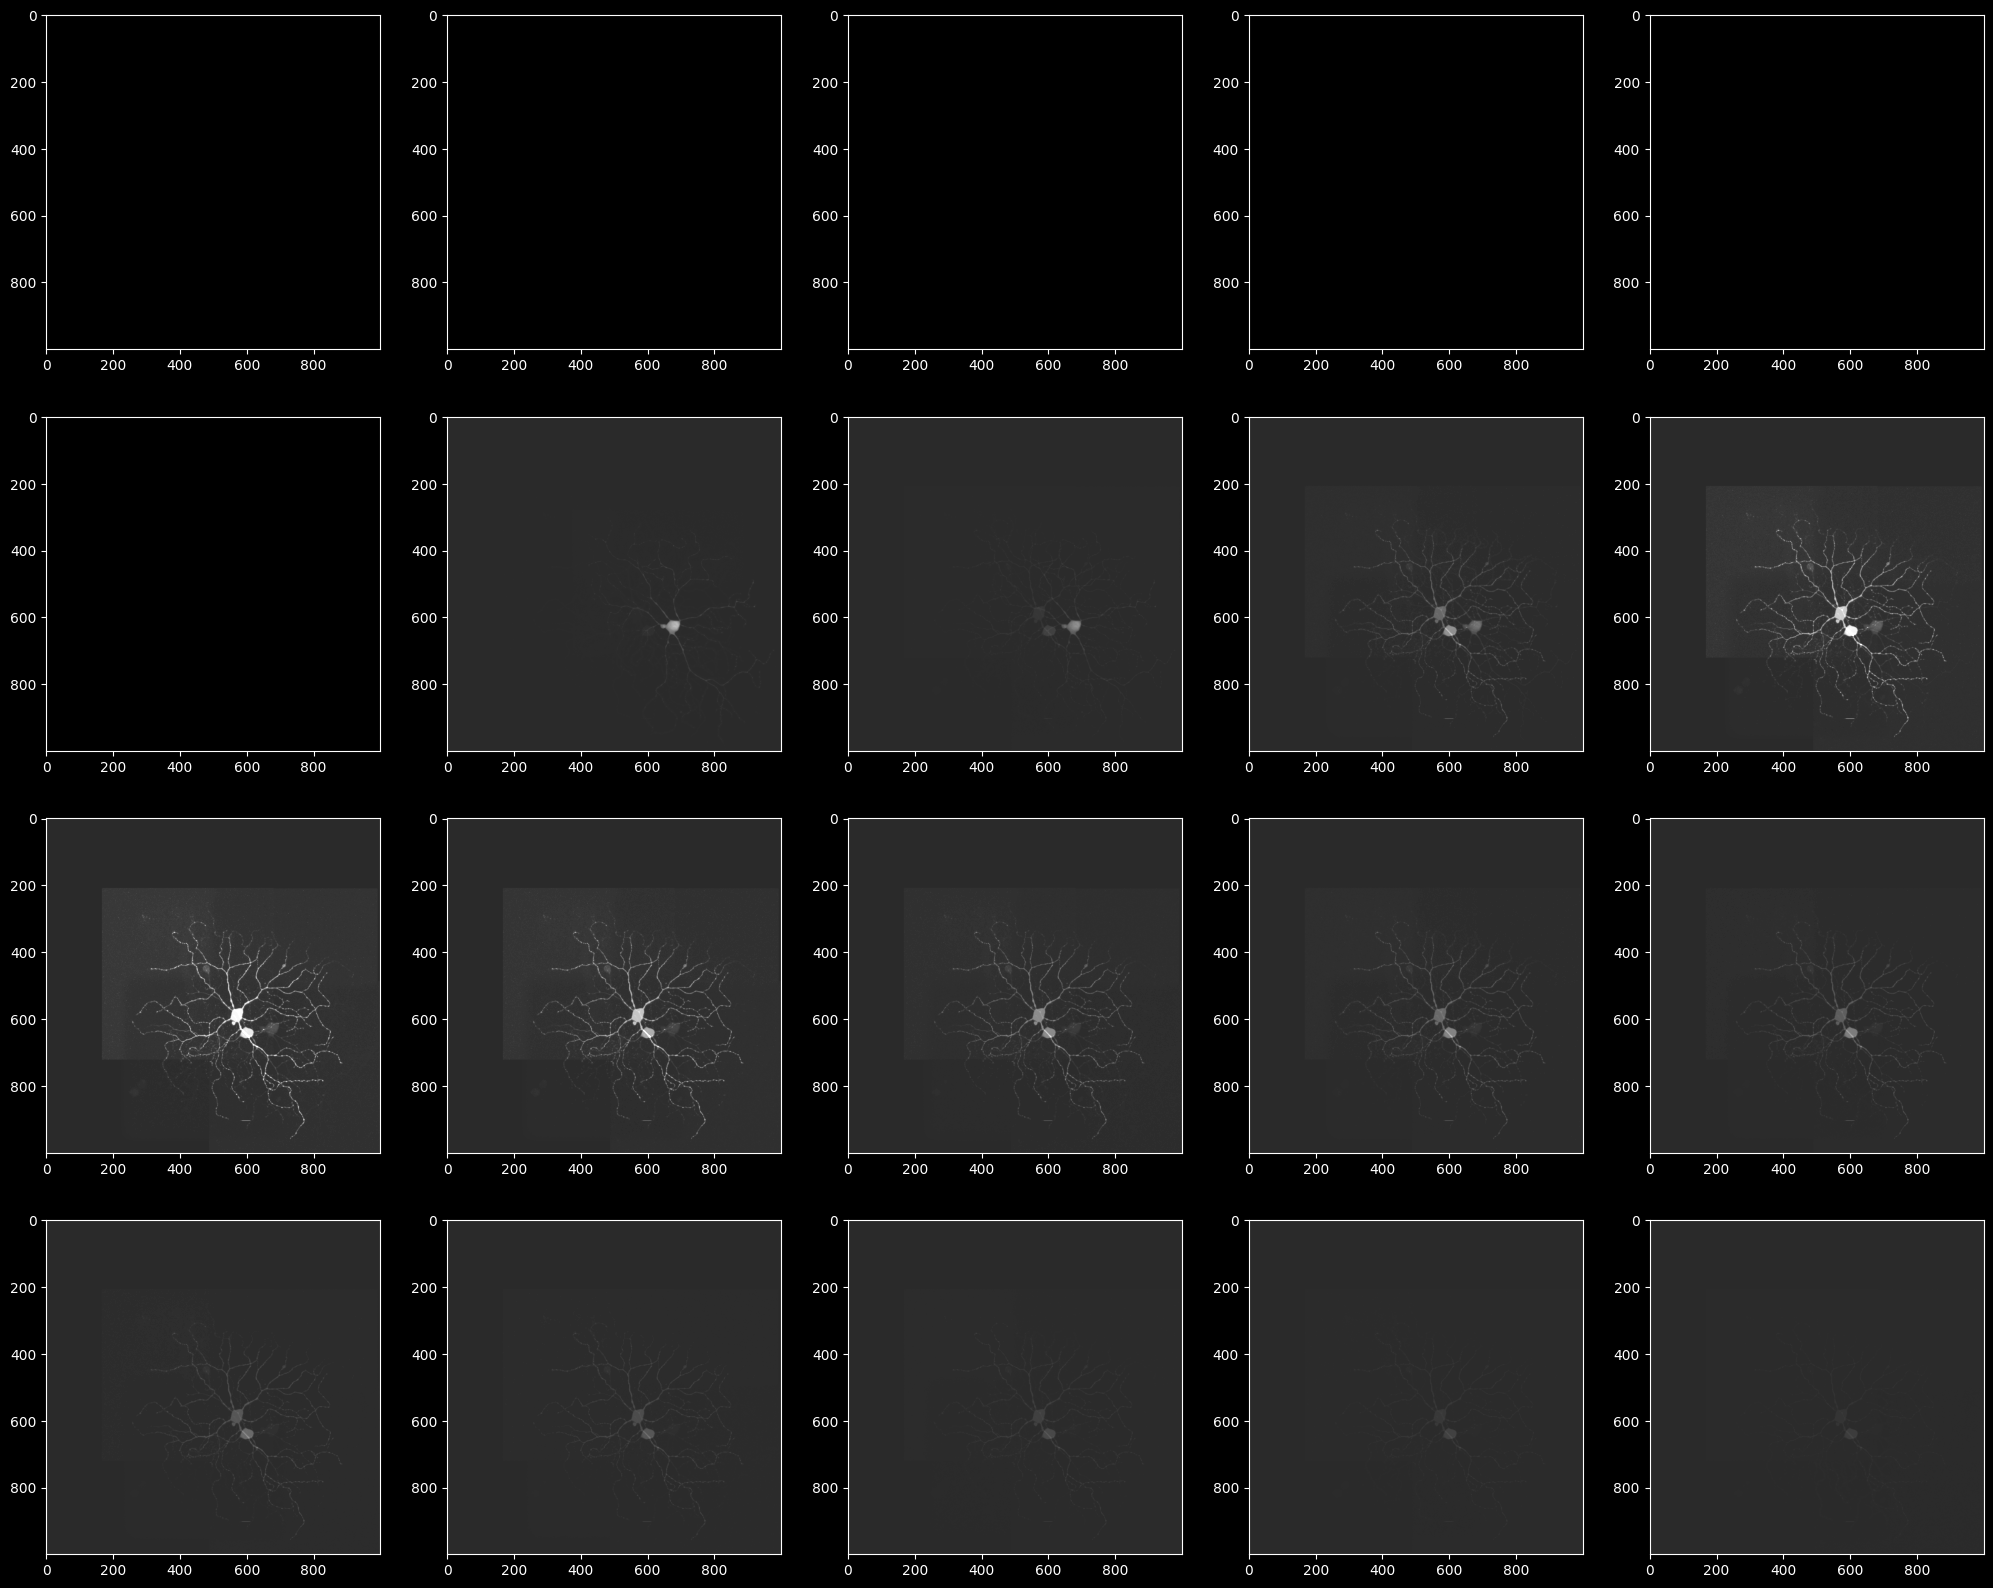

In [10]:
#assume the cell is filled with 488. How does it look in each channel?

# 2) multiply by the 488 em wavelength...
_, axs = plt.subplots(4,5,figsize=(25,20))
axs = axs.flatten()

for i,ax in enumerate(axs):
    # print(np.nanmean(dfs[0][(dfs[0].wl >= (470 + 10*i)) & (dfs[0].wl < (480 + 10*i))].em))



    r = projs[0] * np.nanmean(dfs[0][(dfs[0].wl >= (470 + 10*i)) & (dfs[0].wl < (480 + 10*i))].em)
    g = projs[1] * np.nanmean(dfs[1][(dfs[1].wl >= (470 + 10*i)) & (dfs[1].wl < (480 + 10*i))].em)
    b = projs[2] * np.nanmean(dfs[2][(dfs[2].wl >= (470 + 10*i)) & (dfs[2].wl < (480 + 10*i))].em)

    # rgb = np.clip(np.stack((r,g,b), axis=-1) + .25, 0.0, 1.0)
    rgb = r + g + b

    im = ax.imshow(rgb, cmap='gray')
    im.set_clim(-.2,1)


In [11]:
#now we want to look at unmixing
# we will add some noise (additive? multiplicative?) and try to unmix by the spectra
# this is just a sparse NNMF problem, since f = em*c + n, and c is a sparse vector

# but also, since we know the spectra, can't we just solve this with least squares?

nc = 128
chans = np.linspace(530, 660, nc+1)

d = np.zeros((nc, 1000, 1000))
em = np.zeros((4,nc))
n = .005

for i in range(nc):

    em[0,i] = np.nanmean(dfs[0][(dfs[0].wl >= chans[i]) & (dfs[0].wl < chans[i+1])].em)
    em[1,i] = np.nanmean(dfs[1][(dfs[1].wl >= chans[i]) & (dfs[1].wl < chans[i+1])].em)
    em[2,i] = np.nanmean(dfs[2][(dfs[2].wl >= chans[i]) & (dfs[2].wl < chans[i+1])].em)

    
    r = projs[0] * em[0,i]
    g = projs[1] * em[1,i]
    b = projs[2] * em[2,i]
    # rgb = np.clip(np.stack((r,g,b), axis=-1) + .25, 0.0, 1.0)
    r[np.isnan(r)] = 0
    g[np.isnan(g)] = 0
    b[np.isnan(b)] = 0
    
    
    d[i] = r/3 + g/3 + b/3  
    
    
    # d[np.isnan(d)] = 0
    d[i] += np.random.randn(1000, 1000) * n
    
em[np.isnan(em)] = 0

C:\Users\zfj\AppData\Local\Temp\ipykernel_4924\2677730635.py:18: RuntimeWarning: Mean of empty slice
  em[2,i] = np.nanmean(dfs[2][(dfs[2].wl >= chans[i]) & (dfs[2].wl < chans[i+1])].em)


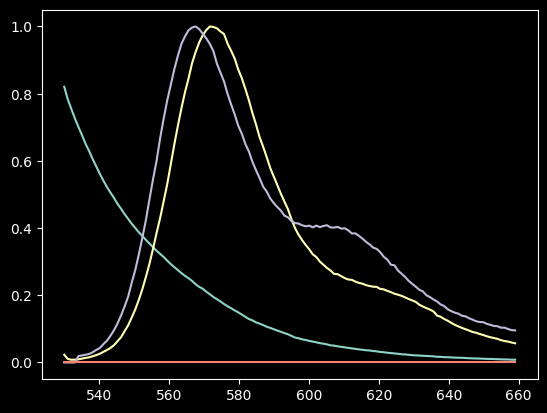

In [12]:
plt.plot(chans[:-1],em.T)

In [13]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

nd = 3
mod = NMF(n_components=nd, random_state=0)
# mod = PCA(n_components=4, random_state=0)

W = mod.fit_transform(d.reshape(nc,-1).T - d.min())

c:\Users\zfj\anaconda3\envs\func_img\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


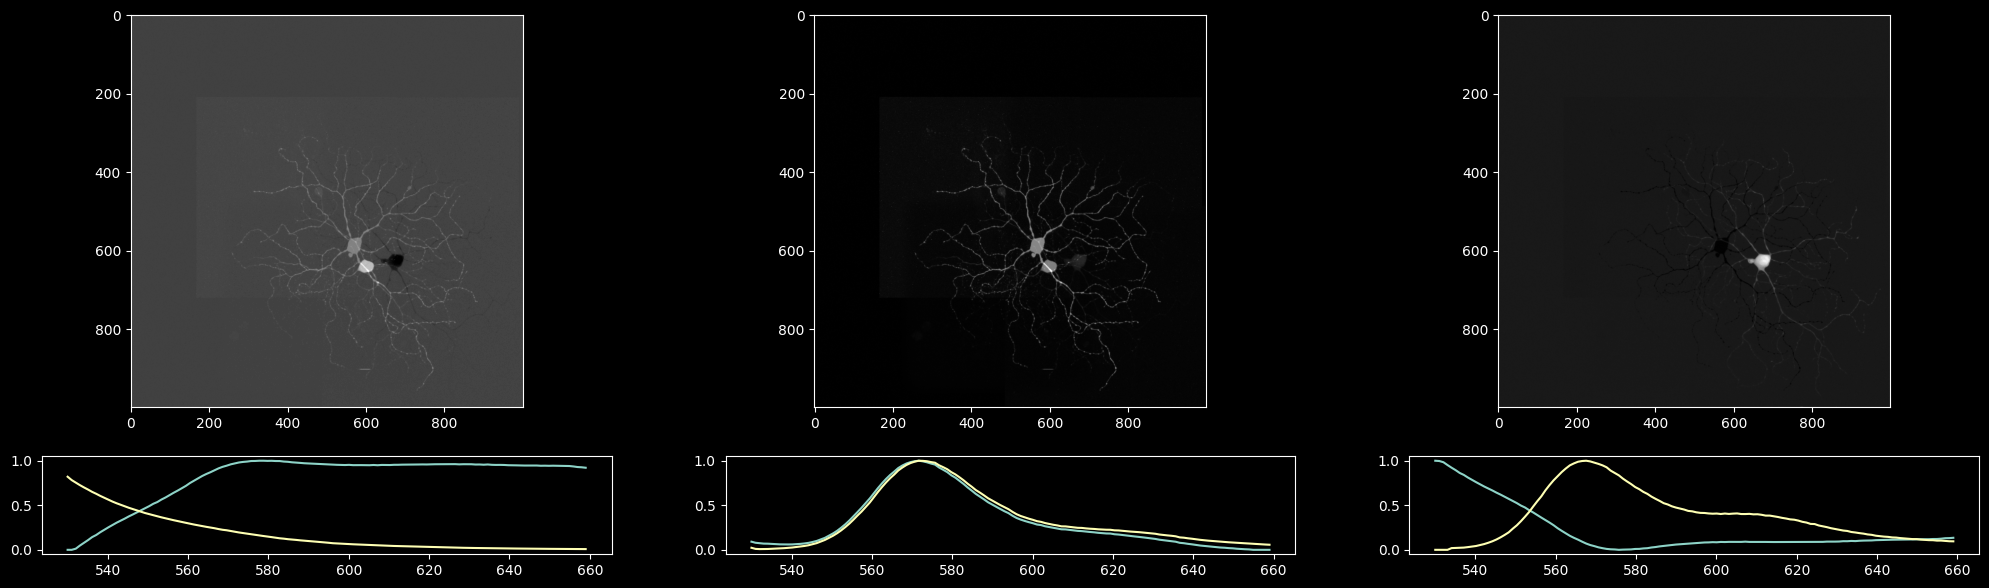

In [14]:
_,axs = plt.subplots(2,nd,figsize=(25,7), gridspec_kw={'height_ratios':[4,1]})


for i in range(nd):
    axs[0,i].imshow(W[:,i].reshape((1000,1000)), cmap='gray')
    axs[1,i].plot(chans[:-1], (mod.components_[i] - mod.components_[i].min()) / (mod.components_[i].max() - mod.components_[i].min()))
    axs[1,i].plot(chans[:-1], em[i,:])



In [321]:
#f = em.T * c + n
#(nd X np) = (nd X nc) * (nc X np)

# em * f = em * em.T * c
# inv(em * em.T ) * em * f = c


# mod.components_.shape, em.shape, .shape
# em.shape, d.shape, (np.linalg.inv(em @ em.T)).shape
# (np.linalg.inv((em.T @ em)) @ em.T).shape
d.shape, em.shape

((128, 1000, 1000), (4, 128))

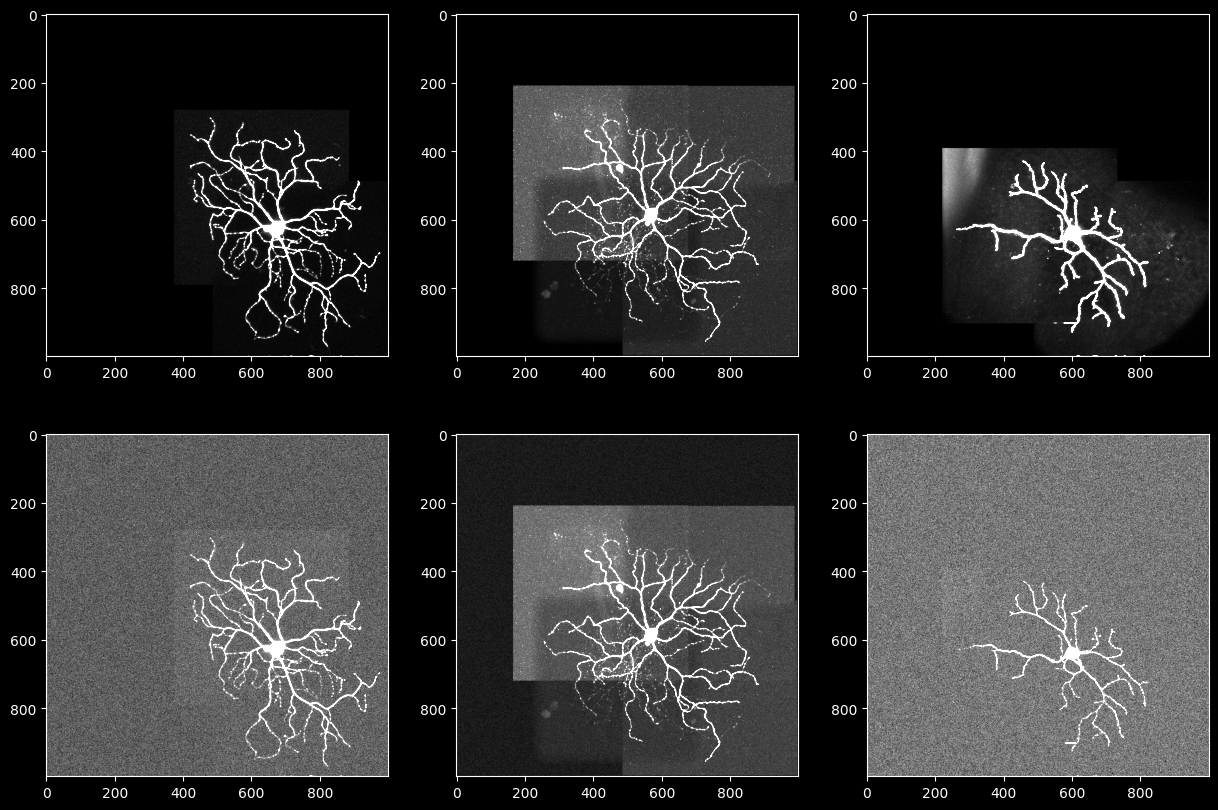

In [15]:
# chans = (d.reshape((20, -1)).T @ (np.linalg.inv(em.T @ em) @ em.T)).T.reshape((-1,1000,1000,))
emi = em[:3]
c = (np.linalg.inv(emi @ emi.T) @ emi @ d.reshape((nc, -1))).reshape((-1, 1000, 1000))

# plt.imshow(c[2], cmap='gray')
# plt.colorbar()

_,axs = plt.subplots(2,3,figsize=(15,10))
for i in range(3):
    im = axs[0,i].imshow(projs[i], cmap='gray')
    lo, hi = np.percentile(projs[i], (2,98))
    im.set_clim(lo, hi)

    im = axs[1,i].imshow(c[i], cmap='gray')
    lo, hi = np.percentile(c[i], (2,98))
    im.set_clim(lo, hi)
    

# d.reshape((20, -1))
# plt.imshow(chans[2], cmap='gray')


673 636
-173 -136


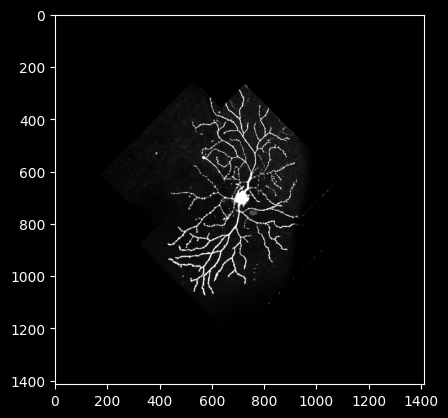

In [354]:
from scipy.ndimage import gaussian_filter, rotate


# plt.imshow(np.clip(gaussian_filter(projs[6], 10),*np.percentile(projs[6], [2,98])), cmap='gray')

# get the soma index 
yc, xc = np.unravel_index(np.argmax(gaussian_filter(projs[6], 10)), projs[6].shape)
print(xc, yc)


# shift the array so that the soma is at new coords
xf,yf = 500,500

print(xf - xc, yf - yc)
tmp = np.roll(projs[6], yf - yc, axis=0)
tmp = np.roll(tmp, xf - xc, axis=1)
# tmp = np.roll(projs[6], (xc - xf, yc - yf))
# tmp = projs[6]

# plt.imshow(np.clip(tmp,*np.percentile(tmp, [2,98])), cmap='gray')
plt.imshow(np.clip(rotate(tmp, 45),*np.percentile(tmp, [2,98])), cmap='gray')




[[<matplotlib.lines.Line2D at 0x20891df6e80>],

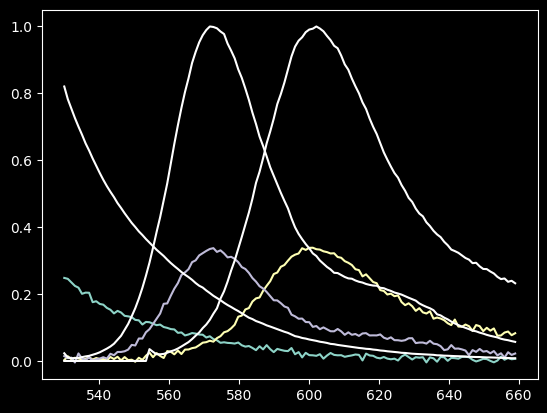

In [355]:
d.shape, em.shape
# np.einsum('ijk*i -> jk', d, em[0]).shape
# plt.imshow(np.einsum('ijk,i->jk', d, em[1]), cmap='gray')
# plt.imshow(d[50][600:640, 550:700])

plt.plot(chans[:-1],d[:, 630, 680])
plt.plot(chans[:-1],d[:, 640, 600])
plt.plot(chans[:-1],d[:, 600, 570])

[plt.plot(chans[:-1], em[i,:], c='w') for i in range(3)]

([<matplotlib.axis.XTick at 0x19840a758b0>,
 [Text(0, 0, '300'),
  Text(100, 0, '400'),
  Text(200, 0, '500'),
  Text(300, 0, '600'),
  Text(400, 0, '700'),
  Text(500, 0, '800')])

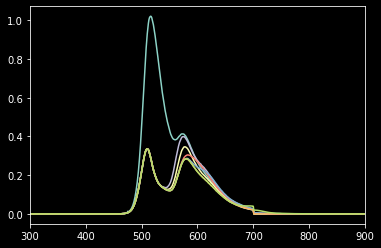

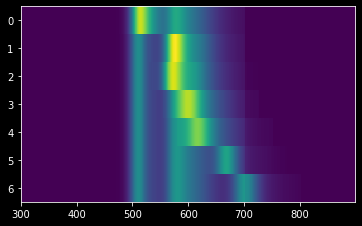

In [353]:
gfp_em[np.isnan(gfp_em)] = 0
tom_em[np.isnan(tom_em)] = 0

for i in range(len(alexae)):
    plt.plot(wl, 
        .01*(33.54*gfp_em*gfp[gfp['wl']==488]['ex'].values
        +95.22*tom_em*tom[tom['wl']==488]['ex'].values)
        +alexa_em[:,i]*dfs[i][dfs[i]['wl']==488]['ex'].values
    )
plt.xlim(300,900)
plt.figure()
plt.imshow((gfp_em[:,None]+tom_em[:,None]+alexa_em).T, aspect=50, interpolation='none')
plt.xticks(np.arange(0,600,100), wl[np.arange(0,600,100)])
# for i in range(6):
#     plt.axhline(i+.5,0,1,color='w')

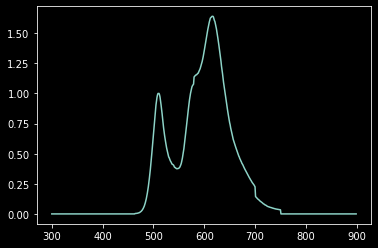

In [335]:

plt.plot(wl, gfp_em+tom_em+alexa_em[:,4])


Text(0.5, 1.0, '+Alexa 680')

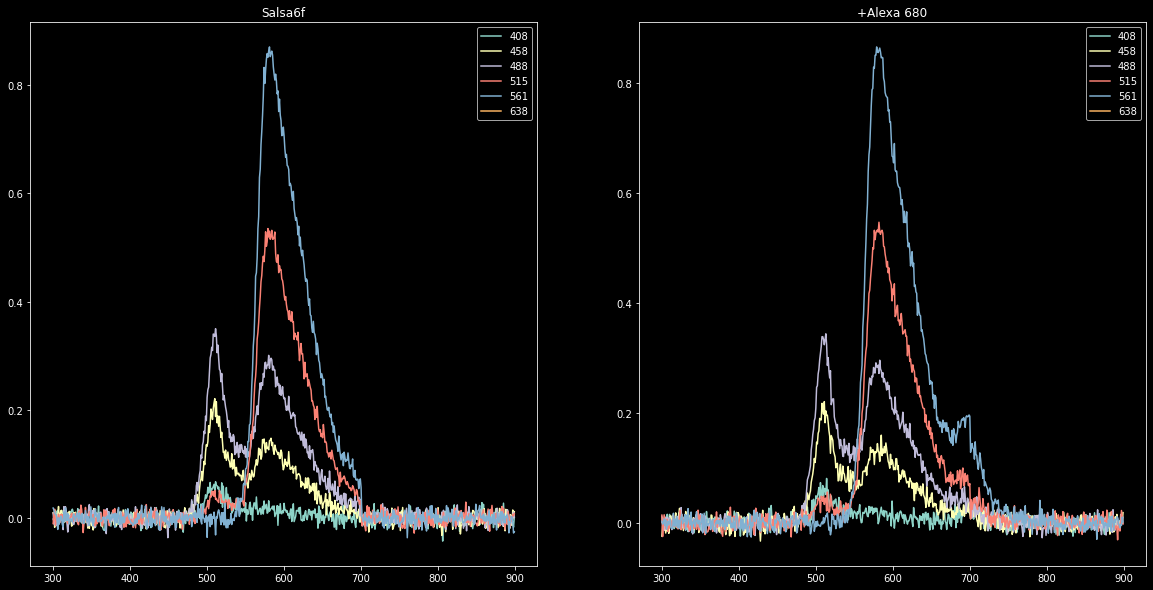

In [391]:
i = -1
fig,axs = plt.subplots(1,2,figsize=(20,10))
exs = [408,458,488,515,561,638]
for ex in exs:
    axs[0].plot(wl, 
            .01*(33.54*gfp_em*gfp[gfp['wl']==ex]['ex'].values
            +95.22*tom_em*tom[tom['wl']==ex]['ex'].values)
            # +alexa_em[:,i]*dfs[i][dfs[i]['wl']==ex]['ex'].values
            +np.random.randn(len(wl))*.01
        )
    axs[1].plot(wl, 
        .01*(33.54*gfp_em*gfp[gfp['wl']==ex]['ex'].values
        +95.22*tom_em*tom[tom['wl']==ex]['ex'].values)
        +alexa_em[:,i]*dfs[i][dfs[i]['wl']==ex]['ex'].values
        +np.random.randn(len(wl))*.01
    )
axs[0].legend(exs)
axs[1].legend(exs)
axs[0].set_title(f'Salsa6f')
axs[1].set_title(f'+Alexa {alexae[i]}')

In [ ]:
# Params:
# salsa / alexa ratio
# tomato vs gcamp noise
# noise level and model
# pixels with psf overlapping multiple cells...
# proportion of pixels with different compositions?
# lambda spacing
#saturation

In [709]:
samps = np.zeros((9,1000, 6, 32)) #1000 samples, 25 ems, 6 exs, 7 dyes + 1 no dye + 1 background
wls = np.linspace(180,450,32).astype(int)

mixing = .01

for i,ex in enumerate(exs):
    salsa = mixing*(33.54*gfp_em*gfp[gfp['wl']==ex]['ex'].values
        +95.22*tom_em*tom[tom['wl']==ex]['ex'].values)
    for a in range(len(alexae)):
        aex = dfs[a][dfs[a]['wl']==ex]['ex'].values

        if len(aex):
            samps[a,:,i,:] = (salsa + alexa_em[:,a]*aex)[None,wls]
        else:
            samps[a,:,i,:] = salsa[None,wls]
    samps[7,:,i,:] = salsa[None,wls]

samps[np.isnan(samps)] = 0
noiseless = samps.copy()

samps *= 1e3
samps += 100
samps += np.random.poisson(samps)
samps += np.random.randn(*samps.shape) * 100
# samps += .1

samps[samps<0] = 0
    

In [710]:
from sklearn.decomposition import NMF

# n_comps = 3
fluors = [0,3,1,7]


nmf = NMF(n_components = len(fluors), l1_ratio = 1.0)#, alpha_H = 1e5, alpha_W=1e3)
decomp = nmf.fit_transform(samps[fluors].reshape(1000*(len(fluors)),-1))

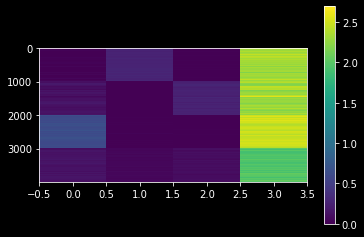

In [711]:
plt.imshow(decomp, aspect=1/2000, interpolation='none')
plt.colorbar()

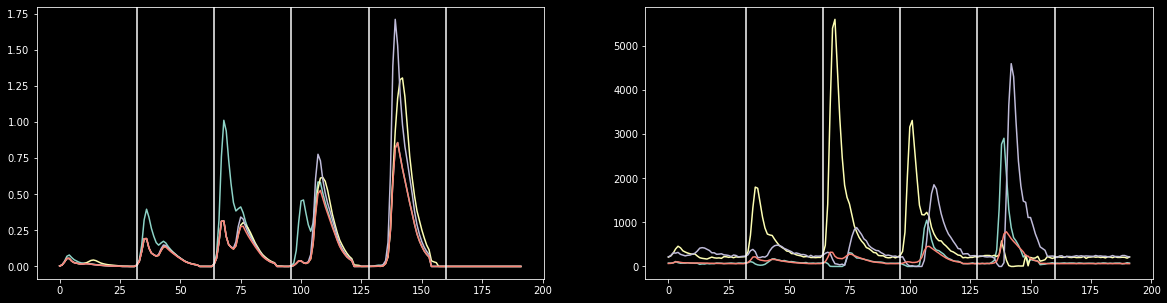

In [712]:
# nmf.components_.

fig,axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(noiseless[fluors,1,:,:].reshape(len(fluors),-1).T)
axs[1].plot(nmf.components_.T)

for i in range(1,len(exs)):
    axs[0].axvline(len(wls) * i,0,1)
    axs[1].axvline(len(wls) * i,0,1)

(4, 150)